**Testing Linear Regressions and KNN (K-Nearest Neighbors) regression**

The code aims to train machine learning models to predict a person's life satisfaction based on the GDP per capita (average income per person in a country). It uses:

Data from the OECD's Better Life Index and GDP per capita statistics.
Two machine learning models:
Linear Regression.
K-Nearest Neighbors (KNN).
The goal is to establish the relationship between a country's GDP per capita and the average life satisfaction of its residents, visualize this relationship, and make predictions for unseen data, such as Cyprus' GDP per capita.



In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [3]:
import sklearn # Import sklearn library for machine learning tasks
import pandas as pd

# Note : gdp per capita => The total income of the state divided by the number of individuals

def prepare_country_stats(oecd_bli,gdp_per_capita): # Function to prepare country statistics by merging and cleaning data

  oecd_bil = oecd_bil[oecd_bil['INEQUALITY']=='TOT'] # Filter OECD data to include only rows with total equality (TOT)
  oecd_bil = oecd_bil.pivot(index='Country',columns='Indicator',values='Value') # Pivot the data to set countries as rows and indicators as columns
  gdp_per_capita.rename(columns={'2015':'GDP per capita'},inplace=True)
  gdp_per_capita.set_index('country',inplace=True)
  full_country_stats=pd.merge(left=oecd_bli,right=gdp_per_capita,left_index=True,right_index=True) # Merge the two datasets on the country index

  full_country_stats.sort_values(by='GDP per capita',inplace=True) # Sort the merged dataset by GDP per capita
  # Define indices to exclude and keep only the remaining rows
  remove_indices = [0,1,6,8,33,34,35]
  keep_indices = list(set(range(36))-set(remove_indices))
  return full_country_stats[['GDP per capita','life satisfaction']].iloc[keep_indices] # Return the cleaned dataset with selected columns
  """
   The function prepare_country_stats cleans, merges,
   and filters data from OECD's Better Life Index and GDP per capita datasets to create a
   structured dataset showing the relationship between GDP per capita and life satisfaction.
  """


In [4]:
import os # Import the os library for interacting with the file system

datapath = os.path.join('datasets','lifesat','') # Dynamically create the path to the 'lifesat' dataset directory

In [5]:
import urllib.request # Import urllib.request for downloading files from the internet
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" # Define the base URL for the dataset files
os.makedirs(datapath, exist_ok=True) # Create the local directory for datasets if it doesn't already exist

# Loop through the list of dataset filenames
for filename in ('oecd_bli_2015.csv','gdp_per_capita.csv'):
  print('Downloading',filename) # Print the name of the file being downloaded
  url = DOWNLOAD_ROOT + 'datasets/lifesat/' + filename # Construct the full URL for the current file
  urllib.request.urlretrieve(url, datapath + filename) # Download the file and save it in the local directory
  """
  The code downloads two dataset files (oecd_bill_2015.csv and gdp_per_capita.csv)
  from a specified GitHub repository and saves them locally in the lifesat directory,
  creating the directory if it doesn't already exist.
  """



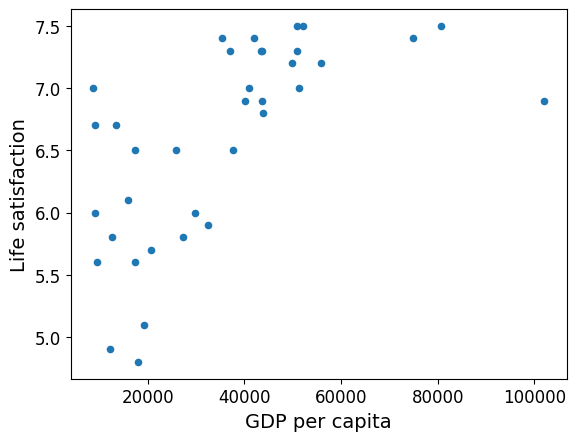

[[7.15367008]]


In [17]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]] # Feature
y = np.c_[country_stats["Life satisfaction"]] # Label
"""
Note: This setup, with one feature (GDP per capita) and one label (Life satisfaction), is ideal for linear regression models ✓
"""

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()
"""
OOP
(New instance) => model
(Class) => LinearRegression
(Library) => sklearn.linear_model
"""

# Train the model
model.fit(X, y)
# X : feature , y : label

# Make a prediction
X_new = [[60000]]  # GDP per capita
print(model.predict(X_new)) # outputs [[7.15367008]]
"""
HOW THE MODEL PREDICT ? 🔮
The model will draw the --Best Fit Line--, which represents the optimal relationship between the input (GDP per capita) and the output ( life satisfaction)
Then, a vertical line is drawn from a specific value on the X-axis (input) up to the Best Fit Line
At the intersection point, a horizontal line is drawn to the Y-axis to determine the predicted output (life satisfaction).
"""

In [18]:
# Select a 3-Nearest Neighbors model 👥
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

"""
# Note: In KNN, the fit() method does not perform traditional training.
# It simply stores the training data (X, y) for use during predictions.
# KNN is a lazy learning algorithm 🧘‍♂️, so there is no actual training process.
"""

# Make a prediction
print(model1.predict(X_new)) # outputs [[7.23333333]]

[[7.23333333]]
